## Problem One: Feature selection for practice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")
df_new = df[["GrLivArea", "YearBuilt", "SalePrice"]]
X = df_new[["GrLivArea", "YearBuilt"]]
y = df_new["SalePrice"]

In [2]:
df_new.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [3]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [4]:
df_new.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [5]:
df_new.isna().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

In [6]:
df_new.corr()[["SalePrice"]]

,SalePrice
GrLivArea,0.708624
YearBuilt,0.522897
SalePrice,1.000000


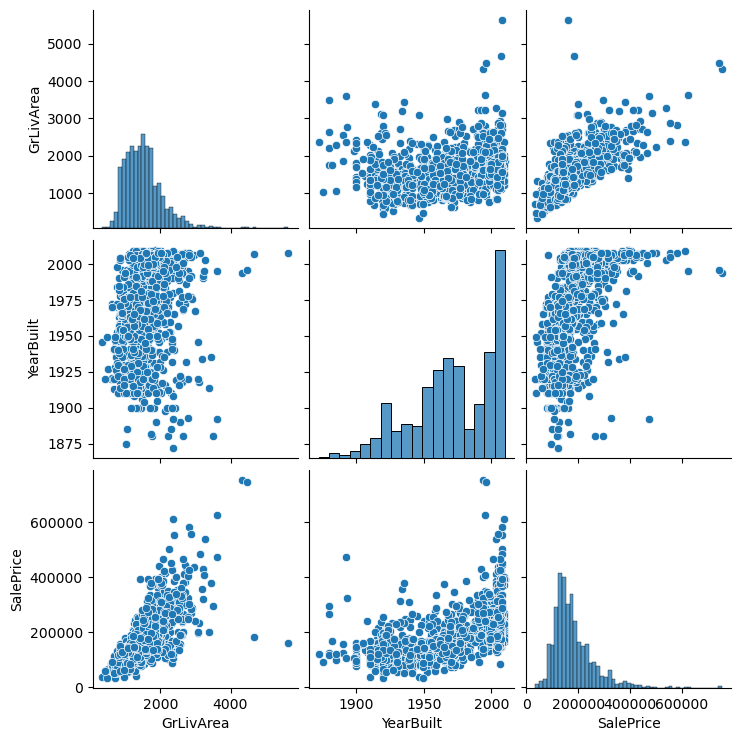

In [7]:
sns.pairplot(df_new)

## Problem Two: Estimation and evaluation by linear regression

In [8]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1168, 2), (292, 2))

In [9]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fitting the scaler on the training data to achieve a unified mean and variance
scaler.fit(X_train)

# transforming the data using the the unified mean and variance
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [10]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Training
regr = LinearRegression()
regr.fit(X_train_transformed, y_train)

# Estimation
regr_pred = regr.predict(X_test_transformed)

In [11]:
# Evaluation
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, regr_pred)
print(f"Mean squared error: {mse :,.2f}")

r_squared = regr.score(X_test_transformed, y_test)
print(f"R-Squared: {r_squared :,.2f}")


print(f"The slope for each feature of the model: {regr.coef_}")
print(f"The intercept of the model: {regr.intercept_}")

Mean squared error: 2,495,554,898.67
R-Squared: 0.67
The slope for each feature of the model: [48312.57752432 31618.74747992]
The intercept of the model: 181441.54195205486


<Figure size 640x480 with 0 Axes>

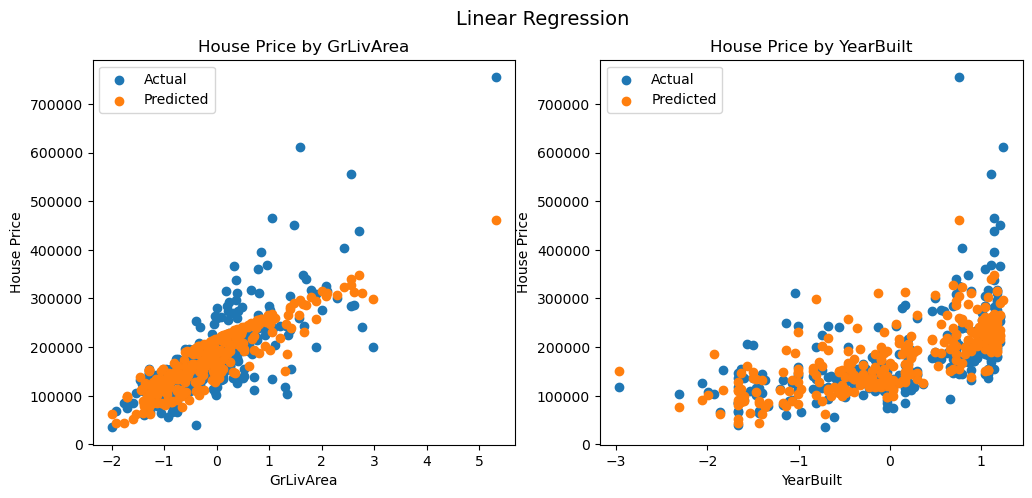

In [12]:
def viz(y_pred, title=""):
    plt.figure()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    ax[0].scatter(X_test_transformed[:,0], y_test)
    ax[0].scatter(X_test_transformed[:,0], y_pred)
    labels = ["Actual", "Predicted"]
    ax[0].set(title="House Price by GrLivArea", xlabel="GrLivArea", ylabel="House Price")
    ax[0].legend(labels=labels)
    
    ax[1].scatter(X_test_transformed[:,1], y_test)
    ax[1].scatter(X_test_transformed[:,1], y_pred)

    ax[1].set(title="House Price by YearBuilt", xlabel="YearBuilt", ylabel="House Price")
    ax[1].legend(labels=labels)

    fig.suptitle(title, fontsize=14)
    plt.show()

viz(regr_pred, "Linear Regression")

## Problem Three: Comparison of methods

Mean squared error: 7,842,026,490.42
R-Squared: -0.02


<Figure size 640x480 with 0 Axes>

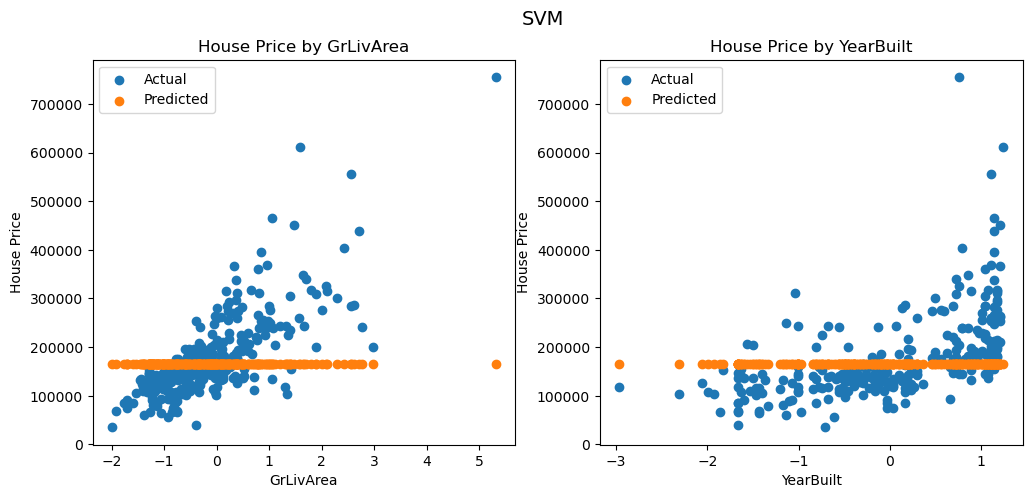

In [13]:
from sklearn.svm import SVR

svm_regr = SVR()

svm_regr.fit(X_train_transformed, y_train)

# Estimation
svm_pred = svm_regr.predict(X_test_transformed)

mse_svm = mean_squared_error(y_test, svm_pred)
print(f"Mean squared error: {mse_svm :,.2f}")

r_squared_svm = svm_regr.score(X_test_transformed, y_test)
print(f"R-Squared: {r_squared_svm :,.2f}")

viz(svm_pred, "SVM")

Mean squared error: 2,155,104,594.56
R-Squared: 0.72


<Figure size 640x480 with 0 Axes>

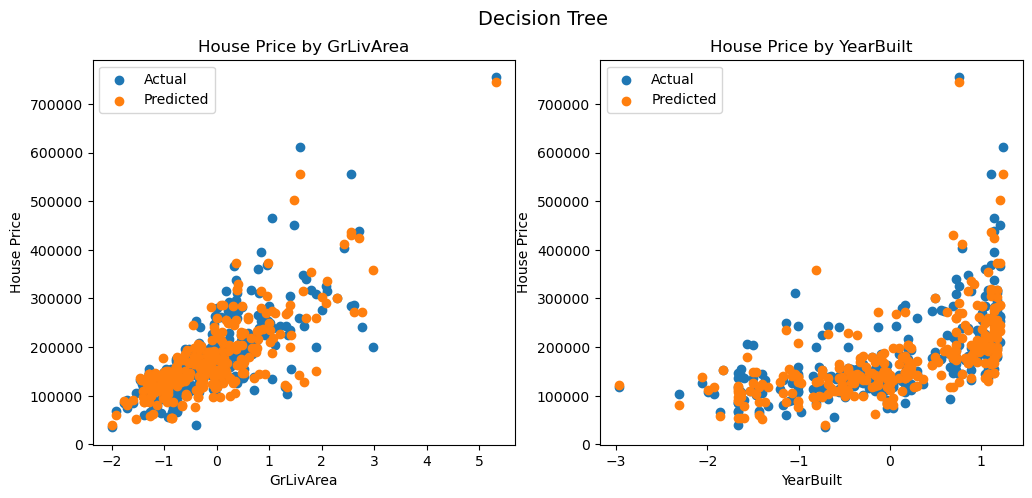

In [14]:
from sklearn.tree import DecisionTreeRegressor

dtree_regr = DecisionTreeRegressor()

dtree_regr.fit(X_train_transformed, y_train)

# Estimation
dtree_pred = dtree_regr.predict(X_test_transformed)

mse_dtree = mean_squared_error(y_test, dtree_pred)
print(f"Mean squared error: {mse_dtree :,.2f}")

r_squared_dtree = dtree_regr.score(X_test_transformed, y_test)
print(f"R-Squared: {r_squared_dtree :,.2f}")

viz(dtree_pred, "Decision Tree")

Mean squared error: 1,634,255,458.46
R-Squared: 0.79


<Figure size 640x480 with 0 Axes>

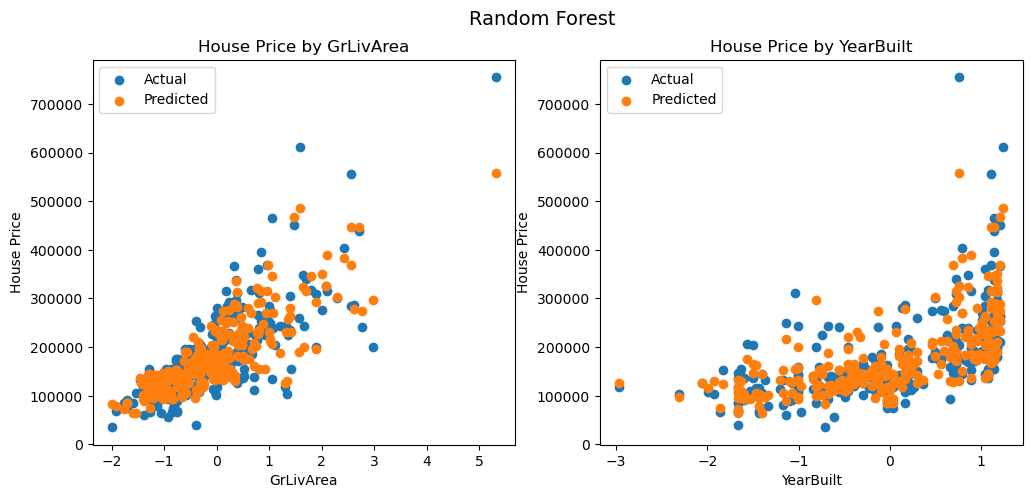

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_regr = RandomForestRegressor()

rf_regr.fit(X_train_transformed, y_train)

# Estimation
rf_pred = rf_regr.predict(X_test_transformed)

mse_rf = mean_squared_error(y_test, rf_pred)
print(f"Mean squared error: {mse_rf :,.2f}")

r_squared_rf = rf_regr.score(X_test_transformed, y_test)
print(f"R-Squared: {r_squared_rf :,.2f}")

viz(rf_pred, "Random Forest")

In [16]:
import prettytable as pt

pt1 = pt.PrettyTable(["Model", "MSE", "R-Squared"])
pt1.add_rows([["Linear Regression", mse, r_squared],
             ["SVM", mse_svm, r_squared_svm], 
             ["Decision Tree", mse_dtree, r_squared_dtree], 
             ["Random Forest", mse_rf, r_squared_rf]])
pt1

Model,MSE,R-Squared
Linear Regression,2495554898.6683207,0.6746481399539467
SVM,7842026490.418324,-0.022385004052411173
Decision Tree,2155104594.5585995,0.7190335148276669
Random Forest,1634255458.4569302,0.7869379457518213


**Summary**

Of all four models used in this exercise, the random forest had the best performance according to the R-Squared metric, 0.78. We can see in its visualizations that the predicted values are closer to the mean of the actual values than the predicted values of the other models. The decision tree model comes close at R-Squared of 0.72, but its visualizations show more outliers than the random forest model.

## Problem (Advance assignment) Learning using other features

In [17]:
df = df.drop("Id", axis=1)
df_corr = df.corr().sort_values(by="SalePrice", ascending=False).head(1)

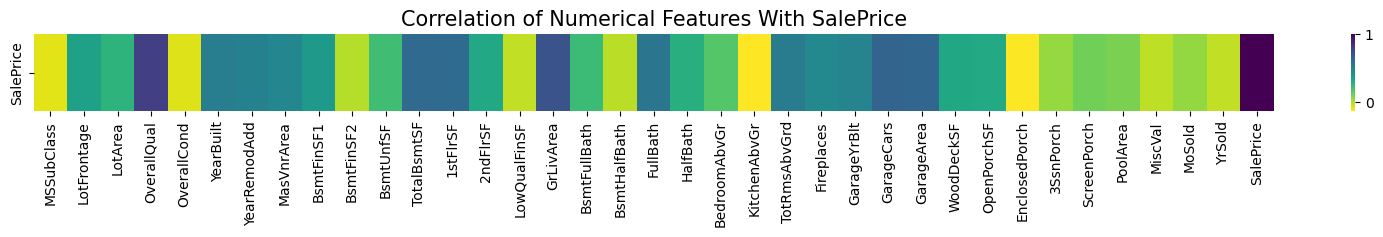

In [18]:
plt.figure(figsize=(20,1))
sns.heatmap(df_corr, cmap="viridis_r")
plt.title("Correlation of Numerical Features With SalePrice", fontsize=15)
plt.show()

In [19]:
# Display the target and top 10 features having a positive correlation with the target
corr = df_corr.sort_values(by="SalePrice", axis=1, ascending=False).iloc[0, :11]
corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [20]:
# Getting the column names of the target and top 10 features having a positive correlation with the target
columns = corr.index

In [21]:
# Creating a subset of the dataframe with the target and top 10 features having a positive correlation with the target
df_10 = df[columns]
df_10.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000


In [22]:
df_10.isna().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [23]:
# Splitting the data into dependent and independent variables
X1 = df_10[columns[1:]]
y1 = df_10[columns[0]]

In [24]:
# Splitting the data into train and test datasets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [25]:
# Instantiating another StandardScaler object
scaler1 = StandardScaler()

# fitting the scaler on the training data to achieve a unified mean and variance
scaler1.fit(X1_train)

# transforming the data using the the unified mean and variance
X1_train_transformed = scaler1.transform(X1_train)
X1_test_transformed = scaler1.transform(X1_test)

In [26]:
def viz2(y1_pred, title=""):
    n_features = 10
    fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(17, 12))

    for ax, feature_index in zip(axs.flat[:n_features], range(n_features)):  # Limit to 10 axes
        ax.scatter(X1_test_transformed[:, feature_index], y1_test, label="Actual")
        ax.scatter(X1_test_transformed[:, feature_index], y1_pred, label="Predicted")
        ax.set(title=columns[1:][feature_index],
               xlabel=columns[1:][feature_index],
               ylabel="House Price")
        ax.legend()

      # Remove axes beyond the first 10
    for ax in axs.flat[n_features:]:
        ax.remove()

    fig.suptitle(title, fontsize=40)
    fig.tight_layout()
    plt.show()

Mean squared error: 1,401,043,190.14
R-Squared: 0.80
The slope for each feature of the model: [26790.55354773 25295.82006233  9230.4385681   2562.93351323
  6423.20548913  5328.94213297 -4076.49572315  1007.77901904
  9317.60154526  6231.50797618]
The intercept of the model: 181712.2867579909


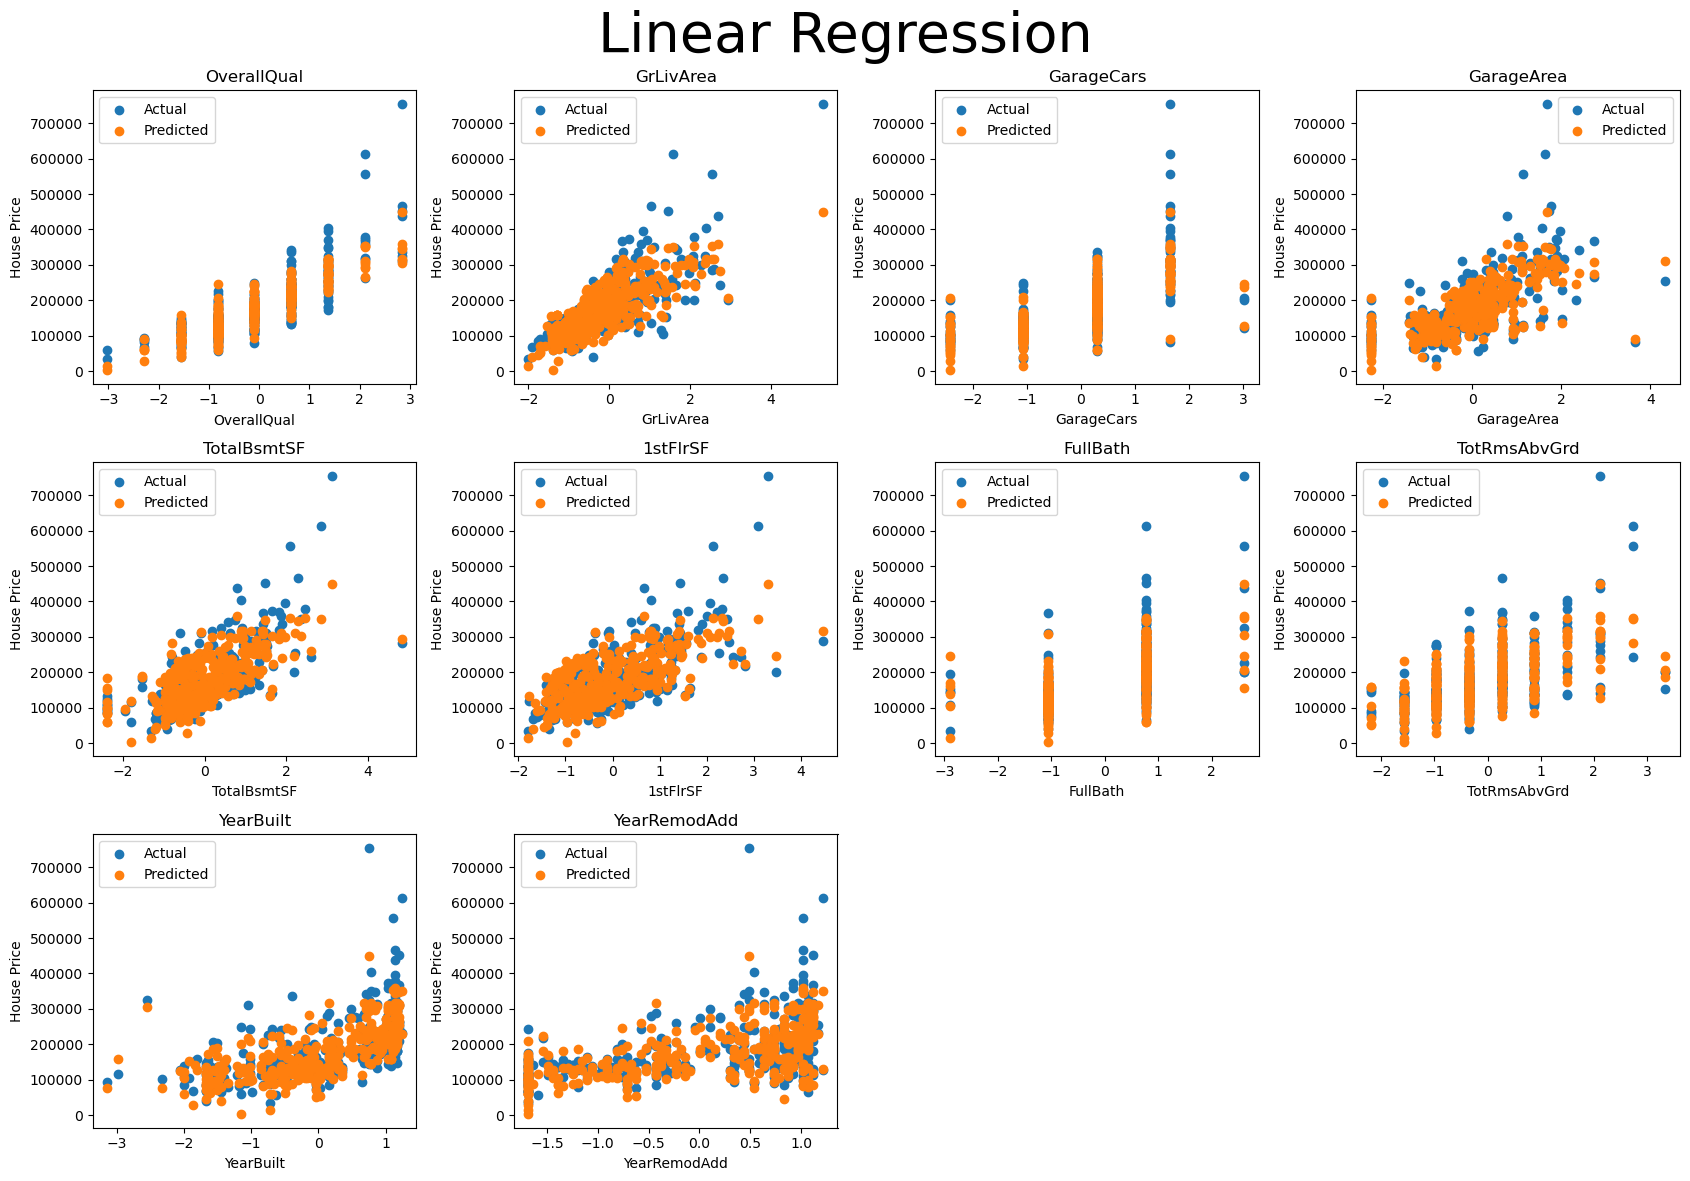

In [27]:
# Linear Regression

# Training
regr = LinearRegression()
regr.fit(X1_train_transformed, y1_train)

# Estimation
regr_pred = regr.predict(X1_test_transformed)

# Evaluation
mse = mean_squared_error(y1_test, regr_pred)
r_squared = regr.score(X1_test_transformed, y1_test)

print(f"Mean squared error: {mse :,.2f}")
print(f"R-Squared: {r_squared :,.2f}")
print(f"The slope for each feature of the model: {regr.coef_}")
print(f"The intercept of the model: {regr.intercept_}")

# Visualization
viz2(regr_pred, "Linear Regression")

Mean squared error: 7,175,787,300.72
R-Squared: -0.02


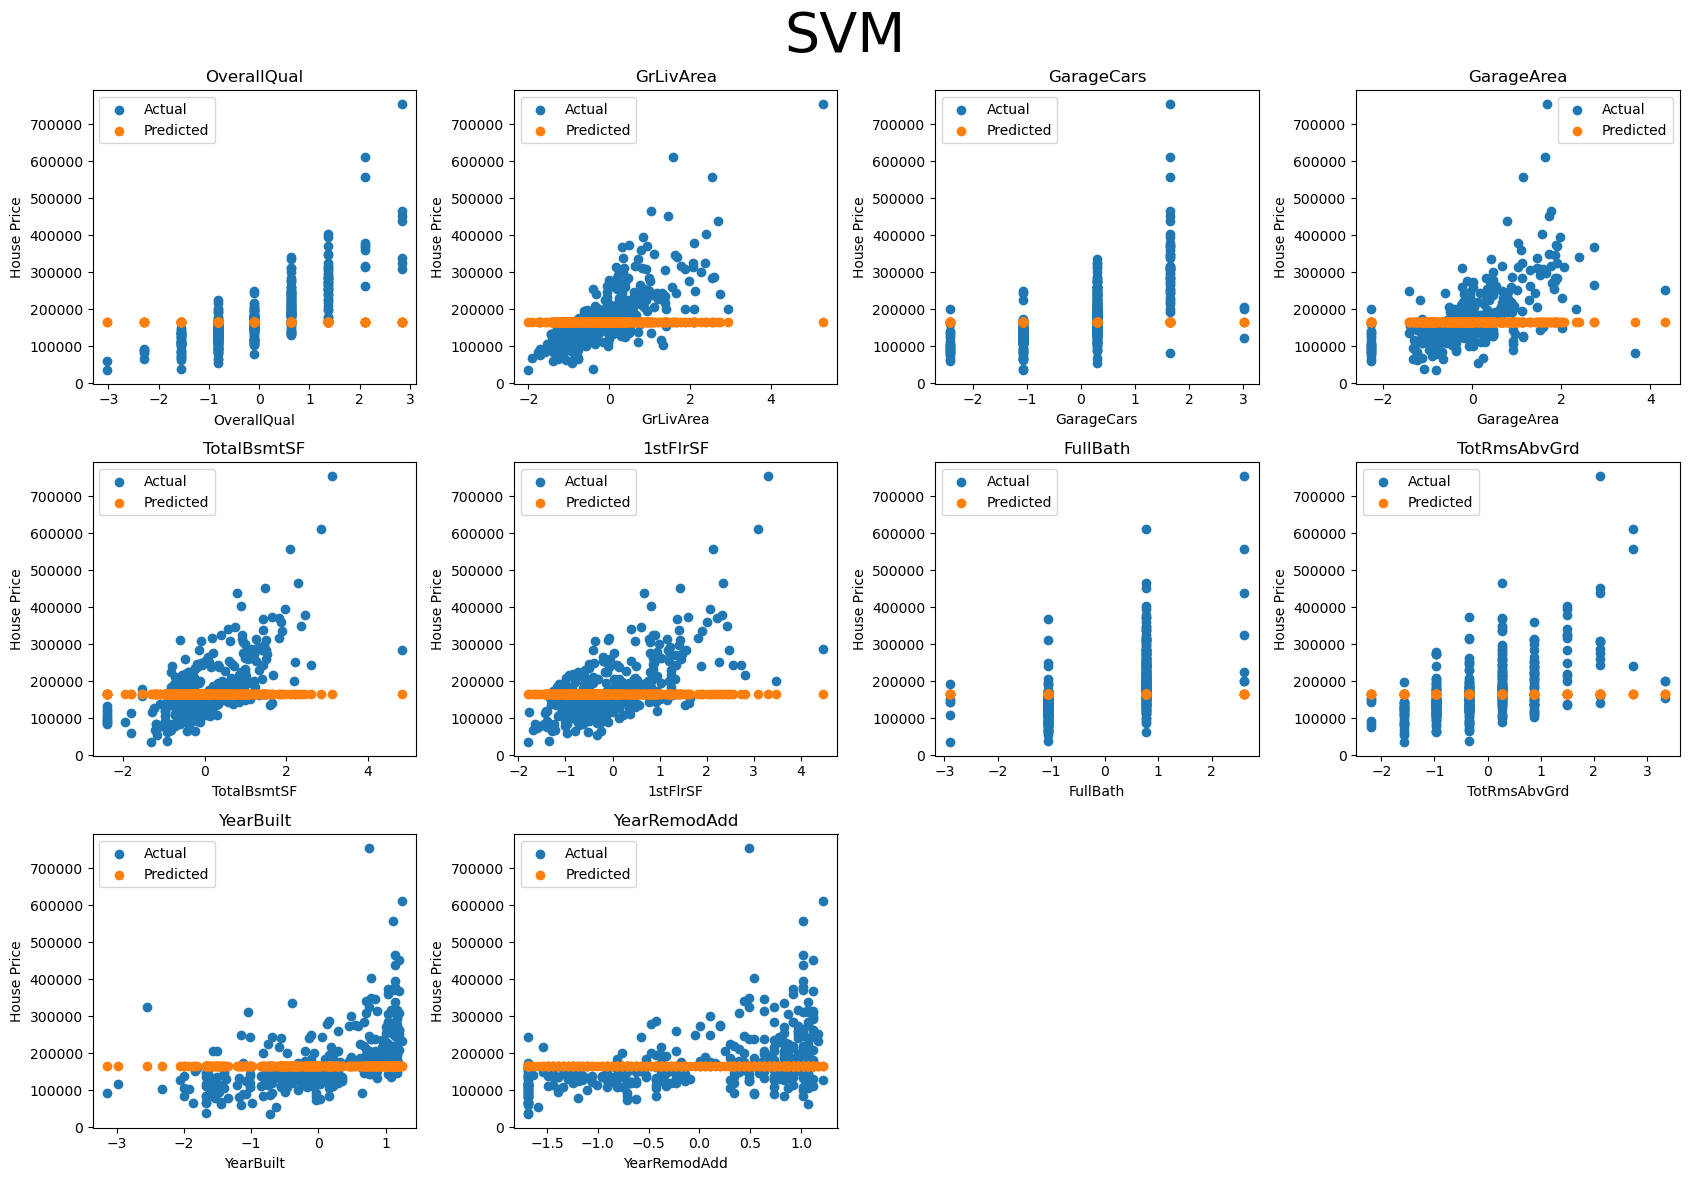

In [28]:
# SVM

# Training
svm_regr = SVR()

svm_regr.fit(X1_train_transformed, y1_train)

# Estimation
svm_pred = svm_regr.predict(X1_test_transformed)

mse_svm = mean_squared_error(y1_test, svm_pred)
print(f"Mean squared error: {mse_svm :,.2f}")

r_squared_svm = svm_regr.score(X1_test_transformed, y1_test)
print(f"R-Squared: {r_squared_svm :,.2f}")

viz2(svm_pred, "SVM")

Mean squared error: 1,348,081,804.70
R-Squared: 0.81


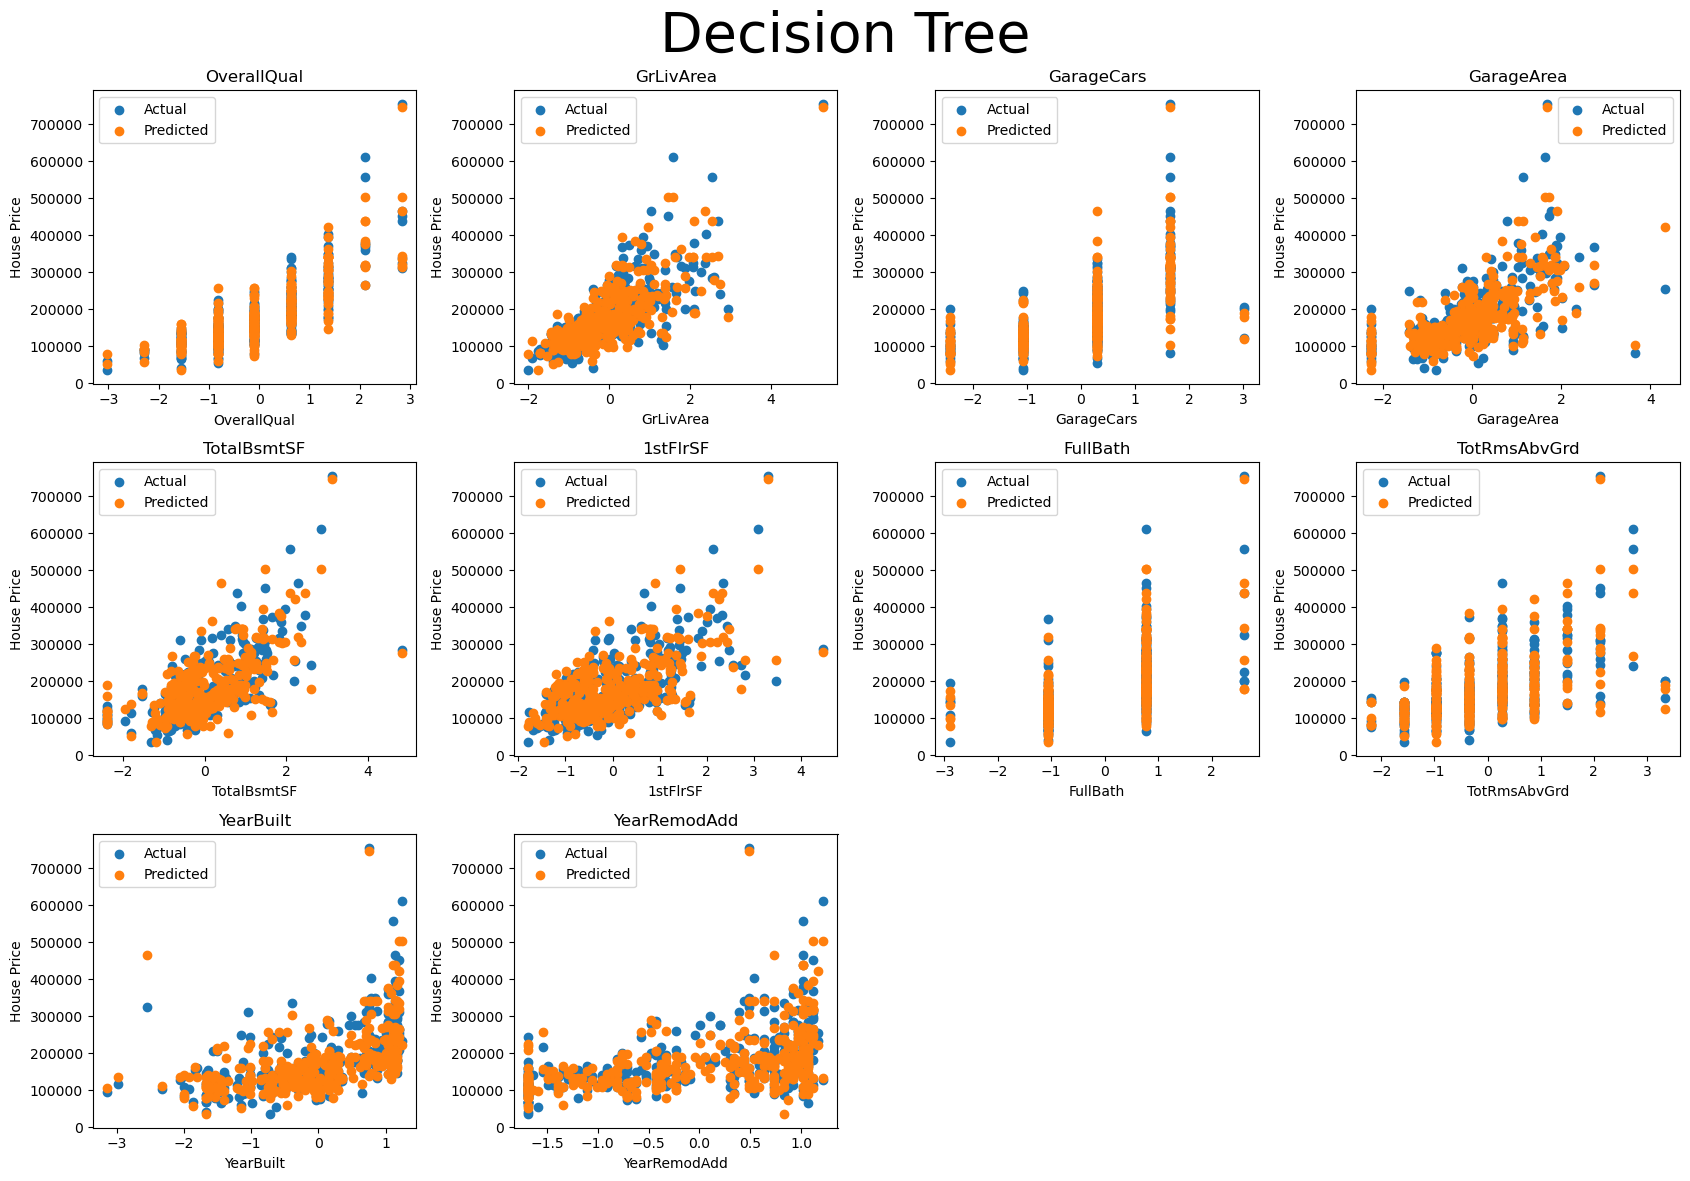

In [29]:
# Decision Tree

dtree_regr = DecisionTreeRegressor()

dtree_regr.fit(X1_train_transformed, y1_train)

# Estimation
dtree_pred = dtree_regr.predict(X1_test_transformed)

mse_dtree = mean_squared_error(y1_test, dtree_pred)
print(f"Mean squared error: {mse_dtree :,.2f}")

r_squared_dtree = dtree_regr.score(X1_test_transformed, y1_test)
print(f"R-Squared: {r_squared_dtree :,.2f}")

viz2(dtree_pred, "Decision Tree")

Mean squared error: 831,582,607.81
R-Squared: 0.88


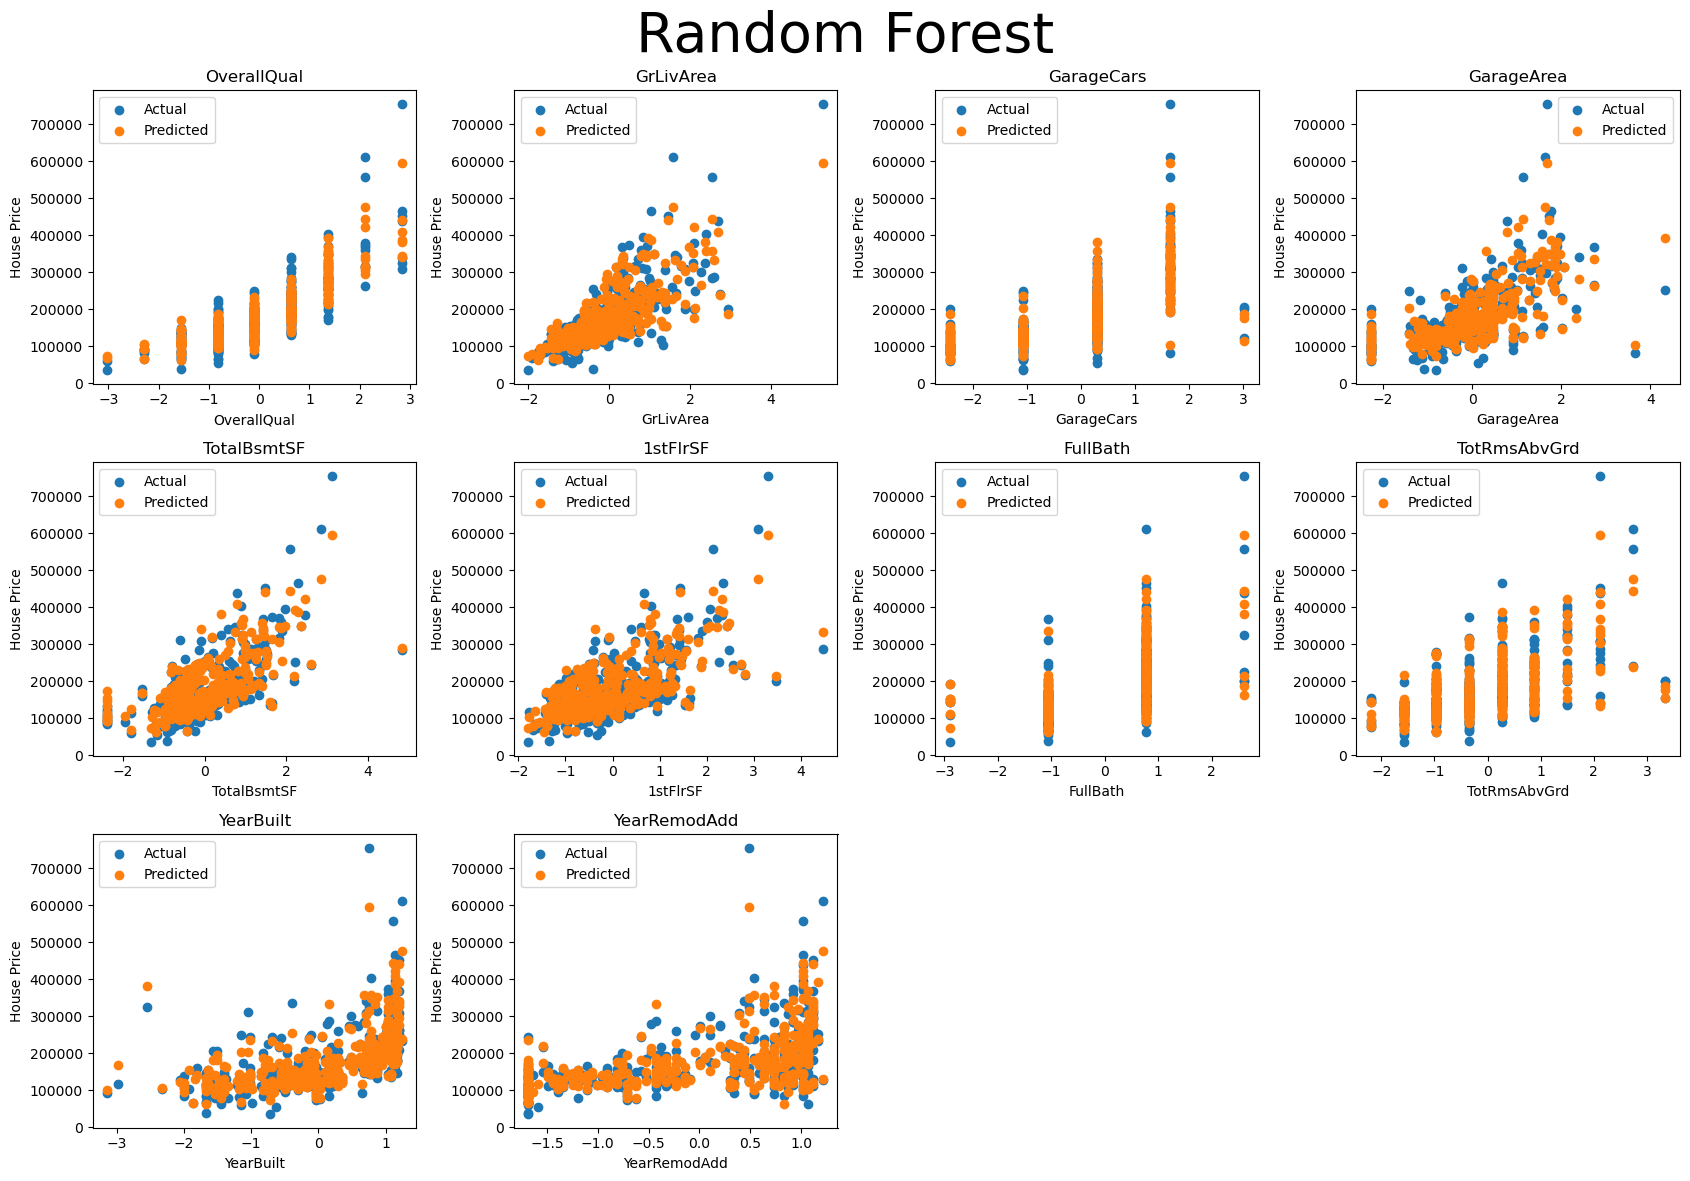

In [30]:
# Random Forest

rf_regr = RandomForestRegressor()

rf_regr.fit(X1_train_transformed, y1_train)

# Estimation
rf_pred = rf_regr.predict(X1_test_transformed)

mse_rf = mean_squared_error(y1_test, rf_pred)
print(f"Mean squared error: {mse_rf :,.2f}")

r_squared_rf = rf_regr.score(X1_test_transformed, y1_test)
print(f"R-Squared: {r_squared_rf :,.2f}")

viz2(rf_pred, "Random Forest")

In [31]:
pt2 = pt.PrettyTable(["Model", "MSE", "R-Squared"])
pt2.add_rows([["Linear Regression", mse, r_squared],
             ["SVM", mse_svm, r_squared_svm], 
             ["Decision Tree", mse_dtree, r_squared_dtree], 
             ["Random Forest", mse_rf, r_squared_rf]])
pt2

Model,MSE,R-Squared
Linear Regression,1401043190.136174,0.8000026580314374
SVM,7175787300.724131,-0.024335578503546618
Decision Tree,1348081804.6989346,0.8075628363250067
Random Forest,831582607.8052197,0.8812925166338629


### Conclusion

Incorporating eight additional features, carefully selected for their correlation with the target variable, enhanced model performance across multiple algorithms. Notably, linear regression demonstrated a remarkable 23% improvement in accuracy compared to its performance with fewer features. Decision tree and random forest models also benefited, exhibiting gains of approximately 10%.

Conversely, the SVM model's performance barely increased, consistently yielding the lowest results in terms of both mean squared error (MSE) and R-squared metrics. This suggests that SVM may not be inherently well-suited for the nuances of this particular dataset or requires further hyperparameter tuning to achieve optimal results.

Among the evaluated models, random forest emerged as the most accurate, achieving an MSE of 7.8052197 and an R-squared of 0.8812925166338629. It effectively captured complex relationships within the data, leading to superior predictive power.

**Key takeaways:**

- Feature selection plays a crucial role in model performance, as evidenced by the improvements observed across algorithms.
- Algorithm selection is equally critical, as different models excel in handling different data structures and relationships.
- SVM may not be the most suitable choice for this dataset without further adjustments.
- Random forest demonstrated the strongest predictive capabilities in this context.